<a href="https://colab.research.google.com/github/Wizzzzzzard/grokking-algorithms-notes/blob/main/7.Djikstra's_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Djikstra's Algorithm

Let’s see how it works with this graph.

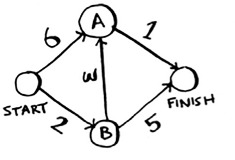

Each segment has a travel time in minutes. You’ll use Dijkstra’s algorithm to go from start to finish in the shortest possible time.

If you ran breadth-first search on this graph, you’d get this shortest path.

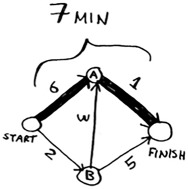

But that path takes 7 minutes. Let’s see if you can find a path that takes less time! There are four steps to Dijkstra’s algorithm:

1.  Find the “cheapest” node. This is the node you can get to in the least amount of time.

2.  Update the costs of the neighbors of this node. I’ll explain what I mean by this shortly.

3.  Repeat until you’ve done this for every node in the graph.

4.  Calculate the final path.

##Step 1
Find the cheapest node. You’re standing at the start, wondering if you should go to node A or node B. How long does it take to get to each node?

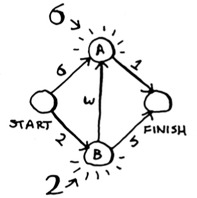

It takes 6 minutes to get to node A and 2 minutes to get to node B. The rest of the nodes, you don’t know yet.

Because you don’t know how long it takes to get to the finish yet, you put down infinity (you’ll see why soon). Node B is the closest node ... it’s 2 minutes away.

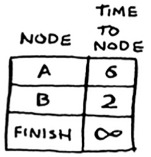

##Step 2

Calculate how long it takes to get to all of node B’s neighbors by following an edge from B.

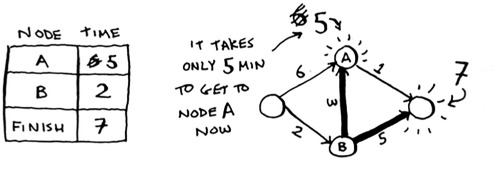

Hey, you just found a shorter path to node A! It used to take 6 minutes to get to node A.

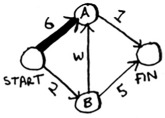

But if you go through node B, there’s a path that only takes 5 minutes!

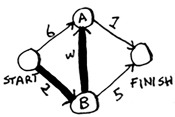

When you find a shorter path for a neighbor of B, update its cost. In this case, you found

*   A shorter path to A (down from 6 minutes to 5 minutes)
*   A shorter path to the finish (down from infinity to 7 minutes)

##Step 3
**Repeat!**

**Step 1 again**: Find the node that takes the least amount of time to get to. You’re done with node B, so node A has the next smallest time estimate.

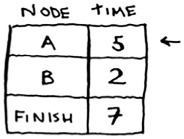

**Step 2 again**: Update the costs for node A’s neighbors.

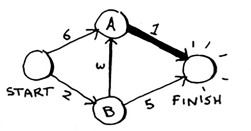

Woo, it takes 6 minutes to get to the finish now!

You’ve run Dijkstra’s algorithm for every node (you don’t need to run it for the finish node). At this point, you know

* It takes 2 minutes to get to node B.
* It takes 5 minutes to get to node A.
* It takes 6 minutes to get to the finish.

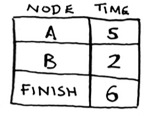

I’ll save the last step, calculating the final path, for the next section. For now, I’ll just show you what the final path is.

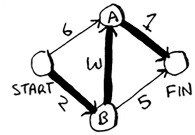

Breadth-first search wouldn’t have found this as the shortest path, because it has three segments. And there’s a way to get from the start to the finish in two segments.

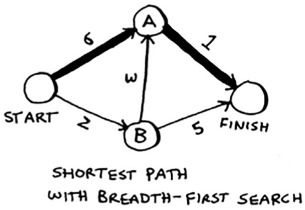

Previously would've used breadth-first search to find the shortest path between two points. Back then, “shortest path” meant the path with the fewest segments. But in Dijkstra’s algorithm, you assign a number or weight to each segment. Then Dijkstra’s algorithm finds the path with the smallest total weight.

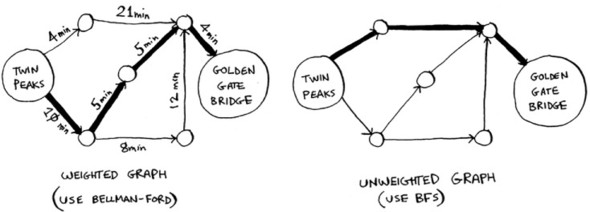

To recap, Dijkstra’s algorithm has four steps:

1.  Find the cheapest node. This is the node you can get to in the least amount of time.

2.  Check whether there’s a cheaper path to the neighbors of this node. If so, update their costs.

3.  Repeat until you’ve done this for every node in the graph.

4.  Calculate the final path.

# Implementation
Let's see how to implement Djikstra's algorithm in code, using the graph below as an example.

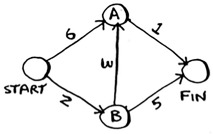

To code the example, will need the following three hash tables.

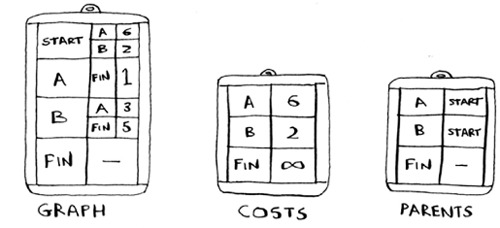

The costs and parents hash tables will be updated as the algorithm progresses. Like with breadth-first search hash tables will be used to store the neighbours and the costs for each node.

The weights are best stored using nested hash tables

In [14]:
graph = {}

graph["start"] = {}
graph["start"] ["a"] = 6
graph["start"] ["b"] = 2

`graph["start"]` is a hash table. You can get all the neighbours for Start like this:

In [15]:
print((graph["start"].keys()))

dict_keys(['a', 'b'])


The weight of the edges can be easily found as well

In [16]:
print(graph["start"] ["a"])
print(graph["start"] ["b"])

6
2


Add the rest of the nodes and their neigbours to the graph:

In [17]:
graph["a"] = {}
graph["a"] ["fin"] = 1

graph["b"] = {}
graph["b"] ["a"] = 3
graph["b"] ["fin"] = 5

graph["fin"] = {} # finish node doesn't have any neighbours

The ***cost*** of a node is how long it takes to get to that node from the start. 

It takes 2 minutes from Start to node B. It takes 6 minutes to get to node A (although you may find a path that takes less time). You don’t know how long it takes to get to the finish. If you don’t know the cost yet, put down infinity.

In [18]:
infinity = float("inf")

Code to make the costs table:

In [19]:
costs = {}
costs["a"] = 6
costs["b"] = 2
costs["fin"] = infinity

Another hash table is needed for the parents

In [20]:
parents = {}
parents["a"] = "start"
parents["b"] = "start"
parents["fin"] = None

Finally an array is needed to keep track of nodes which have already been processed:

In [21]:
processed = []

Let's look at the overall algorithm

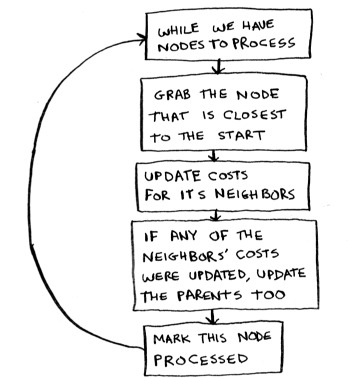

In [ ]:
def find_lowest_cost_node(costs):
  lowest_cost = float("inf")
  lowest_cost_node = None
  for node in costs: # go through each node
    cost = costs[node]
    if cost < lowest_cost and node not in processed: # if its the lowest cost so far and hasn't been processed yet...
      lowest_cost = cost # ...set it as the new lowest cost node
      lowest_cost_node = node
  return lowest_cost_node

In [23]:
node = find_lowest_cost_node(costs) # find the lowest cost node not yet processed
while node is not None: # if all nodes have been process, the while loop will end
  cost = costs[node]
  neighbours = graph[node]
  for n in neighbours.keys(): # go through the neighbours of this node
    new_cost = cost + neighbours[n]
    if costs[n] > new_cost: # if it's cheaper to get to this neighbour by going through this node
      costs[n] = new_cost # updates the cost for this node
      parents[n] = node # this node becomes the new parent for this neighbour
  processed.append(node) # mark this node as processed
  node = find_lowest_cost_node(costs) # find the next node to process, and loop

print("Cost from the start to each node:")
print(costs)

The Setup and Algorithm in it's totality

In [25]:
# the graph
graph = {}
graph["start"] = {}
graph["start"]["a"] = 6
graph["start"]["b"] = 2

graph["a"] = {}
graph["a"]["fin"] = 1

graph["b"] = {}
graph["b"]["a"] = 3
graph["b"]["fin"] = 5

graph["fin"] = {}

# the costs table
infinity = float("inf")
costs = {}
costs["a"] = 6
costs["b"] = 2
costs["fin"] = infinity

# the parents table
parents = {}
parents["a"] = "start"
parents["b"] = "start"
parents["fin"] = None

processed = []

In [24]:
def find_lowest_cost_node(costs):
    lowest_cost = float("inf")
    lowest_cost_node = None

    for node in costs:
        cost = costs[node]
        if cost < lowest_cost and node not in processed:
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node

node = find_lowest_cost_node(costs)

while node is not None:
    cost = costs[node]
    neighbors = graph[node]
    for n in neighbors.keys():
        new_cost = cost + neighbors[n]
        if costs[n] > new_cost:
            costs[n] = new_cost
            parents[n] = node
    processed.append(node)
    node = find_lowest_cost_node(costs)

print("Cost from the start to each node:")
print(costs)

Cost from the start to each node:
{'a': 5, 'b': 2, 'fin': 6}
